########## choose stock list (aka market) ##################

In [4]:
import yfinance as yf
import pandas as pd
import numpy as np
from datetime import date

In [5]:
## To acquire stock list in thailand ###
ex = pd.read_excel('listedCompanies_th_TH.xlsx', sheet_name='listedCompanies_th_TH',skiprows=1)
df = pd.DataFrame(ex['หลักทรัพย์'].astype('str') + '.bk')
df['market'] = ex['ตลาด']
df = df.rename(columns={'หลักทรัพย์' : 'ticker'})
df = df.reset_index(drop=True)
# df = df[:25]

### Acquire informations from yfinance function >> .info

In [6]:
# 1st pulling date for this data #
df['date_pulling'] = date.today()

In [7]:
# 2nd acquiring information from .info #
info_attribute_list = [
    'industry',
    'sector',
    'marketCap',
    'currentPrice',
    'enterpriseValue',
    'totalCashPerShare'
]
# 3rd acquiring information from .quarterly_balance_sheet #
balancesheet_list = [
    'Total Assets',
    'Current Liabilities'
]

# 4th acquiring information from .quarterly_financials #
ttm = 4
financials_list = [
    'EBIT',
    'Operating Income'
]

info_attribute_list_buffer = []
balancesheet_list_buffer = []
financials_list_buffer = []
for i in range(len(df)):
    yfticker = yf.Ticker(df['ticker'][i])

    # 2nd acquiring information from .info #
    info_attribute_list_buffer_r = []
    for j in range(len(info_attribute_list)):
        try:
            info_attribute_list_buffer_r.append(yfticker.info[info_attribute_list[j]])
        except:
            info_attribute_list_buffer_r.append(None)
    info_attribute_list_buffer.append(info_attribute_list_buffer_r)

    # 3rd acquiring information from .balancesheet #
    balancesheet_list_buffer_r = []
    for j in range(len(balancesheet_list)):
        try:
            balancesheet_list_buffer_r.append(yfticker.quarterly_balance_sheet.loc[yfticker.quarterly_balance_sheet.index == balancesheet_list[j]].values[0][0])
        except:
            balancesheet_list_buffer_r.append(None)
    balancesheet_list_buffer.append(balancesheet_list_buffer_r)

    # 4th acquiring information from .quarterly_financials #
    financials_list_buffer_r = []
    for j in range(len(financials_list)):
        try:
            financials_list_buffer_r.append(np.array([yfticker.quarterly_financials.loc[yfticker.quarterly_financials.index == financials_list[j]].values[0][i] for i in range(ttm)]).sum())
        except:
            financials_list_buffer_r.append(None)
    try:
        financials_list_buffer_r.append(yfticker.quarterly_financials.columns[0])
    except:
        financials_list_buffer_r.append(None)
    financials_list_buffer.append(financials_list_buffer_r)

financials_list.append('ttm_latest')
df = df.join(pd.DataFrame(info_attribute_list_buffer, columns=info_attribute_list))
df = df.join(pd.DataFrame(balancesheet_list_buffer, columns=balancesheet_list))
df = df.join(pd.DataFrame(financials_list_buffer, columns=financials_list))


##### Drop NAN #############
df = df.dropna()
##### Drop where marketcap and EBIT < 0#############
df = df.loc[df['enterpriseValue'] >0]
df = df.loc[df['EBIT'] >0]
df = df.loc[df['Operating Income'] >0]
df = df.reset_index(drop=True)

df.to_csv('data_stock_th.csv',index= False)

############################################################################

In [8]:
import yfinance as yf
import pandas as pd
import numpy as np
from datetime import date
df = pd.read_csv('data_stock_th.csv')
print('sector', df['sector'].unique())
print('industry', df['industry'].unique())

sector ['Basic Materials' 'Industrials' 'Real Estate' 'Consumer Defensive'
 'Utilities' 'Consumer Cyclical' 'Communication Services'
 'Financial Services' 'Healthcare' 'Technology' 'Energy']
industry ['Steel' 'Electrical Equipment & Parts' 'Real Estate—Development'
 'Packaged Foods' 'Airlines' 'Utilities—Renewable'
 'Auto & Truck Dealerships' 'Specialty Chemicals' 'Advertising Agencies'
 'Telecom Services' 'Credit Services' 'Textile Manufacturing' 'Auto Parts'
 'Medical Care Facilities' 'Farm Products' 'REIT—Retail' 'REIT—Industrial'
 'Capital Markets' 'Information Technology Services' 'Waste Management'
 'Industrial Distribution' 'REIT—Diversified' 'Communication Equipment'
 'Aluminum' 'Marine Shipping' 'Scientific & Technical Instruments'
 'Publishing' 'Real Estate Services' 'Integrated Freight & Logistics'
 'Airports & Air Services' 'Household & Personal Products'
 'Engineering & Construction' 'Software—Application'
 'Specialty Business Services' 'Building Products & Equipment'
 'El

In [9]:

### Next I perform calculations for MF_ROC and MF_EY ###
represents_earning = 'Operating Income'

df['MF_ROC'] = df[represents_earning]/(df['Total Assets'] - df['Current Liabilities'])
df['MF_EY'] = df[represents_earning]/df['enterpriseValue']
df

,ticker,market,date_pulling,industry,sector,marketCap,currentPrice,enterpriseValue,totalCashPerShare,Total Assets,Current Liabilities,EBIT,Operating Income,ttm_latest,MF_ROC,MF_EY
0,2S.bk,SET,2024-08-18,Steel,Basic Materials,1.594989e+09,2.90,1.336299e+09,0.498,2.400035e+09,3.039420e+08,1.225020e+08,1.041320e+08,2024-03-31,0.049679,0.077926
1,3K-BAT.bk,SET,2024-08-18,Electrical Equipment & Parts,Industrials,4.174800e+09,53.25,3.860087e+09,8.984,3.736470e+09,8.851644e+08,2.054459e+08,2.711131e+07,2024-03-31,0.009508,0.007023
2,A5.bk,mai,2024-08-18,Real Estate—Development,Real Estate,3.369080e+09,2.86,4.706705e+09,0.337,3.775574e+09,1.024737e+09,7.916811e+08,5.779435e+08,2024-06-30,0.210097,0.122792
3,AAI.bk,SET,2024-08-18,Packaged Foods,Consumer Defensive,1.296250e+10,6.10,1.213253e+10,0.468,5.828192e+09,5.910240e+08,9.276925e+08,8.961244e+08,2024-06-30,0.171109,0.073861
4,AAV.bk,SET,2024-08-18,Airlines,Industrials,2.827000e+10,2.20,7.139858e+10,0.124,7.252696e+10,2.862134e+10,3.279661e+09,3.208543e+09,2024-06-30,0.073078,0.044938
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,YGG.bk,mai,2024-08-18,Entertainment,Communication Services,4.876176e+08,0.81,6.950683e+08,0.049,7.375050e+08,7.321346e+07,6.699039e+07,6.147763e+07,2024-03-31,0.092546,0.088448
610,YONG.bk,mai,2024-08-18,Building Materials,Basic Materials,8.092001e+08,1.19,1.302733e+09,0.065,1.304679e+09,3.079860e+08,1.533742e+08,1.510244e+08,2024-06-30,0.151525,0.115929
611,YUASA.bk,mai,2024-08-18,Auto Parts,Consumer Cyclical,1.151587e+09,10.70,7.414010e+08,3.881,1.684253e+09,4.092886e+08,1.939366e+08,1.814172e+08,2024-06-30,0.142292,0.244695
612,ZEN.bk,SET,2024-08-18,Restaurants,Consumer Cyclical,1.595290e+09,5.35,2.688539e+09,0.384,3.047779e+09,8.482120e+08,1.804910e+08,1.804910e+08,2024-06-30,0.082058,0.067133


<Axes: title={'center': 'mai'}, xlabel='MF_EY', ylabel='MF_ROC'>

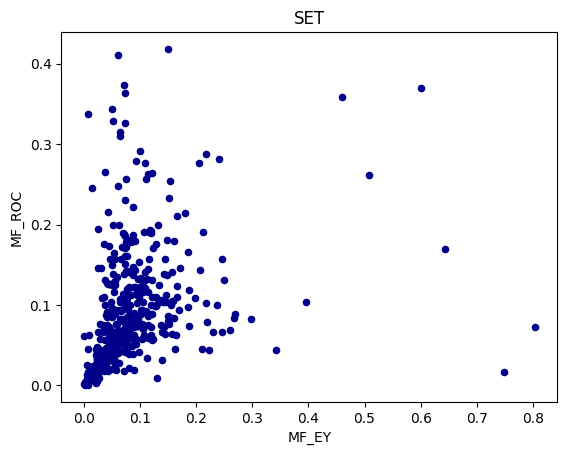

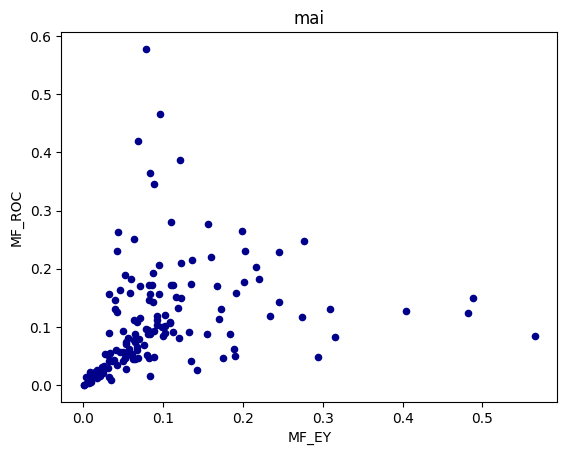

In [10]:
### Explore Market Cap ### By sector #### 
df.loc[df['market'] == 'SET'].plot.scatter(x='MF_EY',
                      y='MF_ROC',
                      c='DarkBlue',title = 'SET')
df.loc[df['market'] == 'mai'].plot.scatter(x='MF_EY',
                      y='MF_ROC',
                      c='DarkBlue',title = 'mai')

In [11]:
### Drop Utilities, Energy, and Financial Services  as suggested from the book ###
sectortoexclude = [
    'Utilities',
    'Energy',
    'Financial Services',
    'Real Estate'
]
for i in sectortoexclude:
    print('exclude sector > ',i)
    try:
         
        df = df.loc[df['sector'] != i]
    except:
        None
        
industrytoexclude =[
    'Engineering & Construction',
    'Building Products & Equipment',
    'Building Materials'
]
for i in industrytoexclude:
    print('exclude industry > ',i)
    try:
         
        df = df.loc[df['industry'] != i]
    except:
        None

df = df.reset_index(drop=True)

exclude sector >  Utilities
exclude sector >  Energy
exclude sector >  Financial Services
exclude sector >  Real Estate
exclude industry >  Engineering & Construction
exclude industry >  Building Products & Equipment
exclude industry >  Building Materials


In [12]:
#### Select market size by choosing ' market ' ###
market = 'SET'
df_market = df.loc[df['market'] == market]
df_market = df_market.reset_index(drop=True)

In [13]:
### Ranking regarding MFs####

df_market['Ranking_MF_ROC'] = df_market['MF_ROC'].rank()
df_market['Ranking_MF_EY'] = df_market['MF_EY'].rank()
df_market['Ranking_MF'] = df_market['Ranking_MF_ROC'] + df_market['Ranking_MF_EY']

df_market.loc[df_market['Ranking_MF'] == df_market['Ranking_MF'].max()]

,ticker,market,date_pulling,industry,sector,marketCap,currentPrice,enterpriseValue,totalCashPerShare,Total Assets,Current Liabilities,EBIT,Operating Income,ttm_latest,MF_ROC,MF_EY,Ranking_MF_ROC,Ranking_MF_EY,Ranking_MF
297,UVAN.bk,SET,2024-08-18,Farm Products,Consumer Defensive,8.178000e+09,8.7,7.130260e+09,1.457,5.792787e+09,516741000.0,1.443106e+09,1.462381e+09,2024-06-30,0.277174,0.205095,293.0,291.0,584.0


In [14]:
numstocks = 50
df_sorted = df_market.sort_values(by=['Ranking_MF'],ascending=False)
df_sorted = df_sorted.reset_index(drop=True)
df_sorted[:numstocks]

,ticker,market,date_pulling,industry,sector,marketCap,currentPrice,enterpriseValue,totalCashPerShare,Total Assets,Current Liabilities,EBIT,Operating Income,ttm_latest,MF_ROC,MF_EY,Ranking_MF_ROC,Ranking_MF_EY,Ranking_MF
0,UVAN.bk,SET,2024-08-18,Farm Products,Consumer Defensive,8.178000e+09,8.70,7.130260e+09,1.457,5.792787e+09,5.167410e+08,1.443106e+09,1.462381e+09,2024-06-30,0.277174,0.205095,293.0,291.0,584.0
1,PT.bk,SET,2024-08-18,Information Technology Services,Technology,2.569196e+09,9.05,2.667472e+09,0.078,2.410914e+09,1.457667e+09,3.886185e+08,3.988328e+08,2024-06-30,0.418394,0.149517,305.0,270.0,575.0
2,ICN.bk,SET,2024-08-18,Telecom Services,Communication Services,1.270269e+09,1.89,1.187927e+09,0.277,1.976144e+09,9.799810e+08,2.150695e+08,2.134139e+08,2024-06-30,0.214236,0.179652,281.0,287.0,568.0
3,KBS.bk,SET,2024-08-18,Confectioners,Consumer Defensive,2.964000e+09,4.94,8.448462e+09,0.139,1.403379e+10,4.658636e+09,1.701101e+09,1.792721e+09,2024-06-30,0.191220,0.212195,273.0,294.0,567.0
4,BIZ.bk,SET,2024-08-18,Medical Devices,Healthcare,1.850264e+09,3.08,1.427995e+09,1.103,1.669257e+09,5.431380e+08,2.524842e+08,2.370027e+08,2024-03-31,0.210460,0.165969,280.0,284.0,564.0
5,CPW.bk,SET,2024-08-18,Electronics & Computer Distribution,Technology,1.452000e+09,2.42,1.719917e+09,0.168,1.949275e+09,9.017210e+08,1.707424e+08,2.656660e+08,2024-03-31,0.253606,0.154464,287.0,275.0,562.0
6,AS.bk,SET,2024-08-18,Electronic Gaming & Multimedia,Communication Services,1.657500e+09,3.32,1.539945e+09,0.707,1.406244e+09,4.061850e+08,3.326363e+08,2.331491e+08,2024-06-30,0.233135,0.151401,285.0,273.0,558.0
7,UTP.bk,SET,2024-08-18,Paper & Paper Products,Basic Materials,7.150000e+09,11.00,5.289186e+09,2.874,5.175989e+09,4.462890e+08,9.613716e+08,8.489970e+08,2024-06-30,0.179503,0.160516,265.0,281.0,546.0
8,AKR.bk,SET,2024-08-18,Electrical Equipment & Parts,Industrials,1.251115e+09,0.85,1.492362e+09,0.085,2.352730e+09,6.708405e+08,2.817950e+08,2.781737e+08,2024-03-31,0.165394,0.186398,255.0,289.0,544.0
9,PM.bk,SET,2024-08-18,Food Distribution,Consumer Defensive,4.576584e+09,8.20,4.516607e+09,0.467,2.745928e+09,6.749650e+08,5.695644e+08,5.479193e+08,2024-06-30,0.264572,0.121312,290.0,251.0,541.0


In [15]:
df_sorted_2 = df_sorted[:numstocks].copy()
df_sorted_2 = df_sorted_2.sort_values(by=['totalCashPerShare'],ascending=False)
df_sorted_2 = df_sorted_2.reset_index(drop=True)
df_sorted_2

,ticker,market,date_pulling,industry,sector,marketCap,currentPrice,enterpriseValue,totalCashPerShare,Total Assets,Current Liabilities,EBIT,Operating Income,ttm_latest,MF_ROC,MF_EY,Ranking_MF_ROC,Ranking_MF_EY,Ranking_MF
0,METCO.bk,SET,2024-08-18,Electronic Components,Technology,3.751191e+09,179.50,1.853029e+09,98.090,9.200357e+09,2.138398e+09,8.879703e+08,7.319250e+08,2024-06-30,0.103643,0.394988,190.0,304.0,494.0
1,KDH.bk,SET,2024-08-18,Medical Care Facilities,Healthcare,1.744578e+09,90.00,1.154449e+09,30.919,9.234060e+08,1.578040e+08,1.594004e+08,1.527765e+08,2024-06-30,0.199551,0.132337,277.0,258.0,535.0
2,SHANG.bk,SET,2024-08-18,Lodging,Consumer Cyclical,6.305000e+09,48.50,2.577884e+09,28.693,8.086747e+09,3.353090e+08,6.933550e+08,6.933550e+08,2024-03-31,0.089449,0.268963,167.0,302.0,469.0
3,THIP.bk,SET,2024-08-18,Packaging & Containers,Consumer Cyclical,2.519992e+09,28.00,1.470126e+09,12.063,3.354000e+09,5.469870e+08,3.744054e+08,2.723403e+08,2024-03-31,0.097021,0.185250,177.0,288.0,465.0
4,SPC.bk,SET,2024-08-18,Food Distribution,Consumer Defensive,1.969896e+10,60.00,1.633725e+10,11.506,3.785917e+10,8.370863e+09,3.432795e+09,2.764893e+09,2024-06-30,0.093762,0.169239,176.0,285.0,461.0
5,AH.bk,SET,2024-08-18,Auto Parts,Consumer Cyclical,5.928946e+09,17.10,9.514963e+09,6.173,2.547749e+10,1.105056e+10,1.848404e+09,1.510809e+09,2024-03-31,0.104721,0.158782,193.0,280.0,473.0
6,NTV.bk,SET,2024-08-18,Medical Care Facilities,Healthcare,4.800000e+09,30.00,3.673487e+09,6.041,2.893072e+09,2.475280e+08,4.516894e+08,4.516894e+08,2024-06-30,0.170736,0.122959,256.0,252.0,508.0
7,PMTA.bk,SET,2024-08-18,Agricultural Inputs,Basic Materials,8.602000e+08,8.50,9.694970e+08,4.293,2.669535e+09,8.187940e+08,2.343163e+08,2.419880e+08,2024-06-30,0.130752,0.249602,223.0,300.0,523.0
8,MEGA.bk,SET,2024-08-18,Drug Manufacturers—Specialty & Generic,Healthcare,3.378496e+10,38.75,2.996574e+10,4.250,1.497095e+10,4.751162e+09,2.346631e+09,2.977635e+09,2024-06-30,0.291360,0.099368,295.0,227.0,522.0
9,TOA.bk,SET,2024-08-18,Specialty Chemicals,Basic Materials,3.397586e+10,17.00,2.884959e+10,3.659,2.133163e+10,5.077793e+09,3.306872e+09,3.098446e+09,2024-06-30,0.190629,0.107400,272.0,235.0,507.0
